In [3]:
# Loading necessary libraries for the project
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Documents\\Semester 8\\IoT Domain Analyst\\Project\\Sleep_health_and_lifestyle_dataset.csv")


In [6]:

# Removing all the NaN values
data.dropna(inplace=True)

# Getting the statistical summary
print(data.describe())

# Selecting features
selected_features = ['Snoring', 'SPO2_Rate', 'Heart_Rate']
data['Snoring'] = data['Snoring'].map({'Yes': 1.0, 'No': 0.0})
X = data[selected_features]
y = data['Sleep_Disorder']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocessing (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the classifier
clf.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test_scaled)
y_pred

# Generating classification report
print(classification_report(y_test, y_pred))


        Person_ID         Age  Sleep_Duration  Quality_of_Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical_Activity_Level  Stress_Level  Heart_Rate   Daily_Steps  \
count               374.000000    374.000000  374.000000    374.000000   
mean                 59.171123      5.385027   71.176471   6816.844920   
std                  20.830804      1.774526    5.274338   1617.915679   
min                  30.000000      3.000000   65.000000   3000.000000   
25%                  45.00

In [10]:
y_pred

array(['Insomnia', 'Insomnia', 'Normal', 'Normal', 'Insomnia', 'Insomnia',
       'Insomnia', 'Normal', 'Normal', 'Normal', 'Insomnia', 'Normal',
       'Normal', 'Insomnia', 'Normal', 'Normal', 'Sleep Apnea', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Insomnia', 'Insomnia',
       'Insomnia', 'Normal', 'Insomnia', 'Insomnia', 'Normal',
       'Sleep Apnea', 'Normal', 'Normal', 'Normal', 'Sleep Apnea',
       'Sleep Apnea', 'Normal', 'Insomnia', 'Normal', 'Normal', 'Normal',
       'Normal', 'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea', 'Normal',
       'Normal', 'Normal', 'Normal', 'Sleep Apnea', 'Normal',
       'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea',
       'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'Normal', 'Insomnia', 'Insomnia',
       'Normal', 'Normal', 'Normal', 'Insomnia', 'Normal', 'Normal',
       'Normal', 'Insomnia', 'Normal', 'Insomnia', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'No

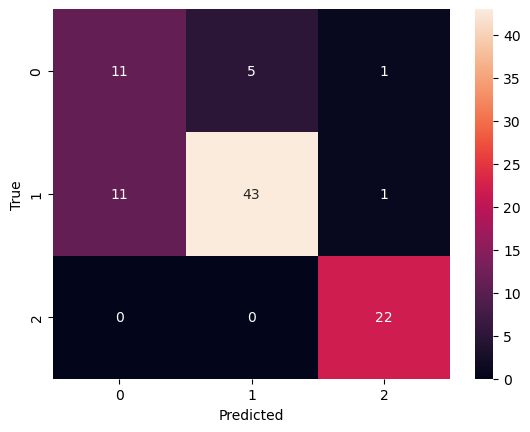

In [7]:

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [8]:
# Evaluating the accuracy of the classifier
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8085106382978723


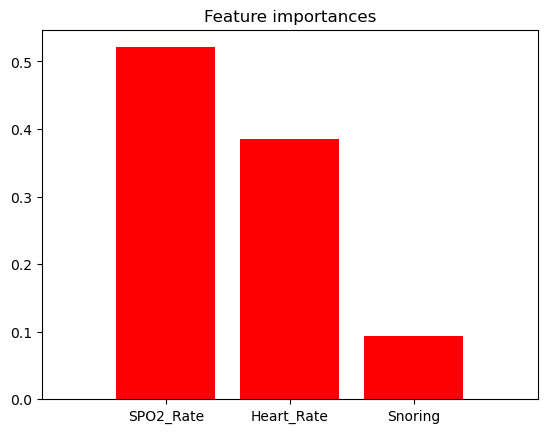

In [9]:


# Plotting feature importances (if applicable for Decision Trees)
if hasattr(clf, 'feature_importances_'):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train_scaled.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X_train_scaled.shape[1]), [selected_features[i] for i in indices])
    plt.xlim([-1, X_train_scaled.shape[1]])
    plt.show()